# Activity Driven Graphs

In [1]:
using Random, Plots

In [2]:
hdist(x, y, β) = abs(x - y)^(-β)

hdist (generic function with 1 method)

In [3]:
abstract type ADGraph end

mutable struct ADIGraph <: ADGraph
    ideologies::Array{Float64, 1}
    mediamask::Array{Bool, 1}
    K::Float64
    β::Float64
    α::Float64
end

mutable struct ADQGraph <: ADGraph
    ideologies::Array{Float64, 1}
    qualities::Array{Float64, 1}
    mediamask::Array{Bool, 1}
    K::Float64
    β::Float64
    α::Float64
end

In [28]:
function updateg(model::ADIGraph)
    n = length(model.ideologies)
    newids = copy(model.ideologies) .* 0.8
    for i=1:n
        if model.mediamask[i]
            norm = sum(hdist(model.ideologies[i], model.ideologies[j], model.β) for j=1:n if i != j)
            connections = 0
            for j=1:n
                if i == j
                    continue
                end
                p = hdist(model.ideologies[i], model.ideologies[j], model.β) / norm
                if rand() < p
                    newids[i] += model.K * tanh(model.α * model.ideologies[j])
                    connections += 1
                end
            end
            #newids[i] /= (model.K * connections + 1)
        end
    end
    m = maximum(model.ideologies - newids)
    newids, m
end

updateg (generic function with 2 methods)

In [5]:
function updateg(model::ADQGraph)
    n = length(model.ideologies)
    for i=1:n
        norm = sum(hdist(model.ideologies[i], model.ideologies[j], model.β) for j=1:n if i != j)
        connections = 0
        for j=1:n
            if i == j
                continue
            end
            p = hphdist(model.ideologies[i], model.ideologies[j], model.β) / norm
            if rand() < p
                newids[i] += model.ideologies[j]
                connections += 1
            end
        end
        newids[i] /= connections + 1
    end
    m = maximum(model.ideologies - newids)
    newids, m
end

updateg (generic function with 2 methods)

In [21]:
mix = shuffle(collect(range(-1, 1, step = 1/50)))

101-element Array{Float64,1}:
 -0.9 
  0.98
 -0.62
  0.94
 -0.02
 -0.28
  0.66
  0.42
 -0.14
  0.82
 -0.12
 -0.04
  0.92
  ⋮   
 -0.46
  0.38
 -0.82
 -0.98
 -0.64
  0.88
  0.32
  0.44
  0.72
  0.54
  0.68
 -0.8 

In [32]:
model = ADIGraph(mix, [true for i=1:101], 10, 2, 0.05)

ADIGraph([-0.9, 0.98, -0.62, 0.94, -0.02, -0.28, 0.66, 0.42, -0.14, 0.82  …  -0.82, -0.98, -0.64, 0.88, 0.32, 0.44, 0.72, 0.54, 0.68, -0.8], Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 10.0, 2.0, 0.05)

In [8]:
model.ideologies, m = updateg(model)

([1.1428865978791736, 0.34, -0.7099730097164604, -0.2898671261534327, 0.6686439935271828, 0.10997300971646043, -0.8355623307083125, 0.74, 0.26, 0.963227352873754  …  0.8, 1.4228865978791734, 0.5492733542414803, -1.1034170344953944, 1.9024321844261163, -0.16, 1.6485207636379153, 0.58, -0.1, 0.5390039838748675], 3.569153079368269)

In [9]:
hcat(model.ideologies, model.ideologies)

101×2 Array{Float64,2}:
  1.14289    1.14289 
  0.34       0.34    
 -0.709973  -0.709973
 -0.289867  -0.289867
  0.668644   0.668644
  0.109973   0.109973
 -0.835562  -0.835562
  0.74       0.74    
  0.26       0.26    
  0.963227   0.963227
  0.68       0.68    
 -2.43525   -2.43525 
  0.725143   0.725143
  ⋮                  
 -0.5       -0.5     
 -0.914632  -0.914632
  0.8        0.8     
  1.42289    1.42289 
  0.549273   0.549273
 -1.10342   -1.10342 
  1.90243    1.90243 
 -0.16      -0.16    
  1.64852    1.64852 
  0.58       0.58    
 -0.1       -0.1     
  0.539004   0.539004

In [10]:
function fullsim!(g::ADIGraph, tol = 10^(-4), maxsteps = 3000)
    m = 1
    ids = g.ideologies
    steps = 0
    while m > tol && steps < maxsteps
        (newids, m) = updateg(g)
        ids = hcat(ids, newids)
        steps += 1
    end
    return ids
end

fullsim! (generic function with 3 methods)

In [33]:
ids = fullsim!(model)

101×3001 Array{Float64,2}:
 -0.9   -0.72      -1.12977   -0.72      …  -0.72      -0.72       -0.72     
  0.98   0.784      1.76322    1.66322       2.21291    0.784       0.784    
 -0.62  -1.1158    -0.815891  -0.496        -0.496     -1.45567    -0.496    
  0.94   2.06116    0.752      1.23163       1.74119    1.23163     1.23163  
 -0.02  -0.016     -0.016     -0.016        -0.016     -0.0659996  -0.016    
 -0.28  -0.224     -0.224     -0.224     …  -0.373989  -0.533975   -0.0740112
  0.66   1.15779    1.13781    0.847891      0.837901   0.867869    1.18776  
  0.42   0.535973   0.535973   0.336         0.515981   0.72595     0.825892 
 -0.14  -0.231994  -0.371991  -0.112        -0.171999  -0.112      -0.191998 
  0.82   1.01584    0.656      0.656         1.54541    1.07575     1.07575  
 -0.12  -0.146     -0.096     -0.146     …  -0.096     -0.146      -0.30599  
 -0.04  -0.032     -0.032     -0.032        -0.181981  -0.042      -0.0719999
  0.92   0.736      2.49483    0.736 

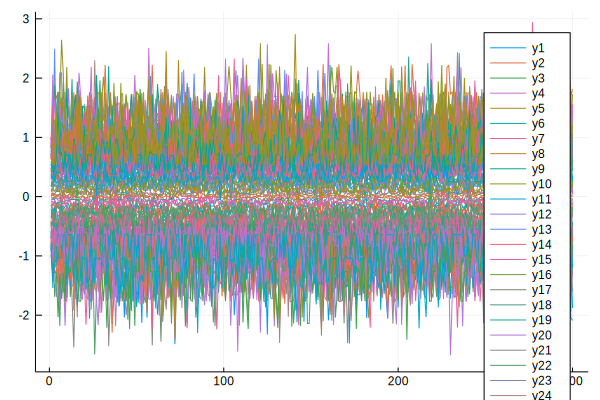

In [34]:
plot(1:300,transpose(ids)[1:300, :])

The above is mostly nonsense because I am taking an ODE model and trying to just jam it in to my discrete-time dynamical model. Or is it because I'm missing the regression-to-zero term. Could be both!